<a href="https://colab.research.google.com/github/karimahagstn/latihan_1/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tahap 1: Import library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer


In [2]:
# Tahap 2: Load dataset
df = pd.read_excel("data_sampel.xlsx")

# Tampilkan 5 data pertama
df.head()


,No (ID),Umur (TAHUN),Jenis kelamin,Nilai uas akidah islam(%),Nilai tugas akidah islam(%),Absensi(%),Durasi Bermain Game (Jam/Hari),Frekuensi Bermain Game,Frekuensi Ibadah Sunnah,Variabel Target (Y)
0,1,13,Perempuan,66,87,70,2,jarang,rutin,sedang
1,2,12,Laki-laki,75,80,70,3,setiap hari,rutin,tinggi
2,3,14,Laki-laki,97,73,70,3,setiap hari,rutin,tinggi
3,4,13,Laki-laki,70,80,80,3,setiap hari,rutin,tinggi
4,5,15,Laki-laki,65,83,95,2,sering,rutin,tinggi


In [3]:
print("=== Informasi Data ===")
print(df.info())

print("\n=== Statistik Deskriptif ===")
print(df.describe(include="all"))

print("\n=== Distribusi Target ===")
print(df["Variabel Target (Y)"].value_counts())


=== Informasi Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   No (ID)                         150 non-null    int64 
 1   Umur (TAHUN)                    150 non-null    int64 
 2   Jenis kelamin                   150 non-null    object
 3   Nilai uas akidah islam(%)       150 non-null    int64 
 4   Nilai tugas akidah islam(%)     150 non-null    int64 
 5   Absensi(%)                      150 non-null    int64 
 6   Durasi Bermain Game (Jam/Hari)  150 non-null    int64 
 7   Frekuensi Bermain Game          150 non-null    object
 8   Frekuensi Ibadah Sunnah         150 non-null    object
 9   Variabel Target (Y)             150 non-null    object
dtypes: int64(6), object(4)
memory usage: 11.8+ KB
None

=== Statistik Deskriptif ===
           No (ID)  Umur (TAHUN) Jenis kelamin  Nilai uas akidah i

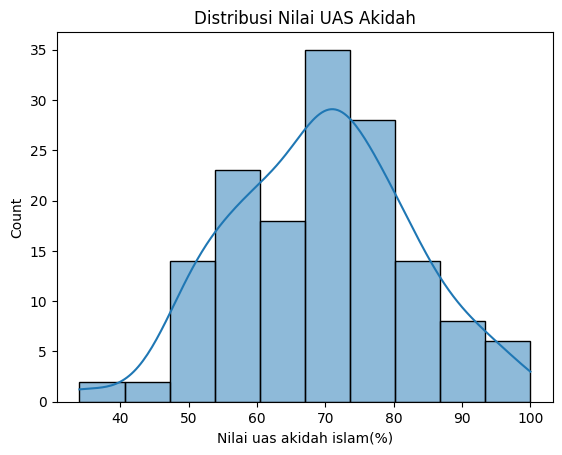

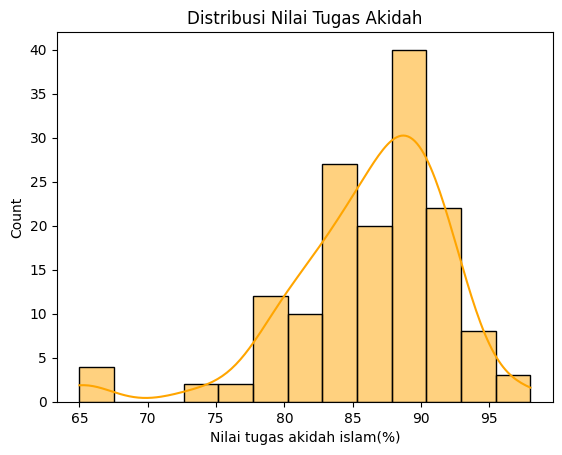

In [4]:
sns.histplot(df['Nilai uas akidah islam(%)'], kde=True)
plt.title("Distribusi Nilai UAS Akidah")
plt.show()

sns.histplot(df['Nilai tugas akidah islam(%)'], kde=True, color='orange')
plt.title("Distribusi Nilai Tugas Akidah")
plt.show()


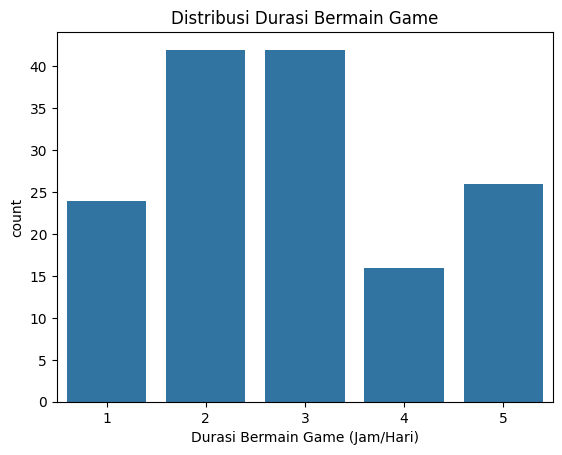

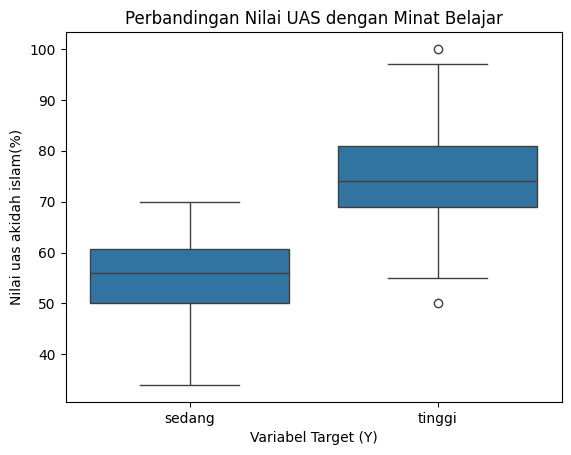

In [5]:
sns.countplot(x='Durasi Bermain Game (Jam/Hari)', data=df)
plt.title("Distribusi Durasi Bermain Game")
plt.show()

sns.boxplot(x='Variabel Target (Y)', y='Nilai uas akidah islam(%)', data=df)
plt.title("Perbandingan Nilai UAS dengan Minat Belajar")
plt.show()


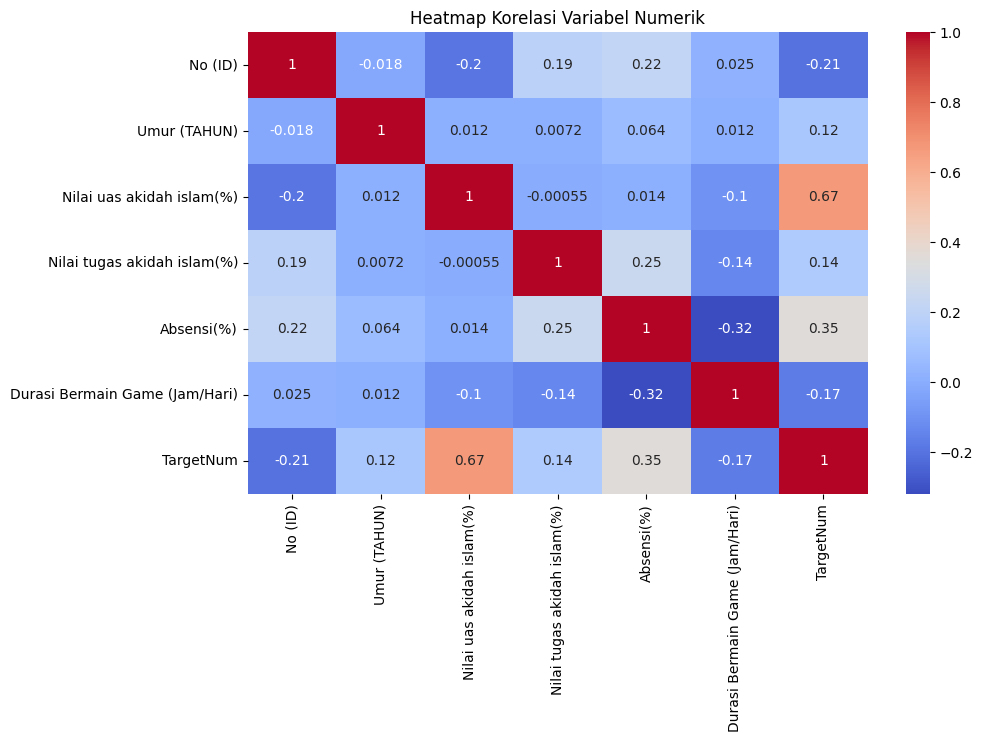

In [6]:
# Heatmap korelasi variabel numerik saja
df_corr = df.copy()
df_corr["TargetNum"] = df_corr["Variabel Target (Y)"].map({"tinggi":1, "sedang":0})

df_corr_numeric = df_corr.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(df_corr_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()


In [7]:
#tahap 4 - preprocessing
df["Variabel Target (Y)"] = df["Variabel Target (Y)"].str.lower().str.strip()
df["y"] = df["Variabel Target (Y)"].map({"tinggi":1, "sedang":0})


In [8]:
#mengubah frekuensi bermain menjadi angka ordinal
def map_freq(x):
    x = str(x).lower()
    if "tidak" in x: return 1
    if "jarang" in x: return 2
    if "1-2" in x: return 2
    if "3-4" in x: return 3
    if "sering" in x or "hampir" in x: return 4
    if "setiap" in x: return 5
    return np.nan

df["freq_mapped"] = df["Frekuensi Bermain Game"].apply(map_freq)


In [9]:
# memilih fitur prediktor
X = df[[
    "Nilai uas akidah islam(%)",
    "Nilai tugas akidah islam(%)",
    "Durasi Bermain Game (Jam/Hari)",
    "freq_mapped"
]]

y = df["y"]


In [10]:
#imputasi nilai kosong
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [11]:
#normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
#tahap - membagi data (train-test split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)


In [13]:
#tahap 6 - mencari nilai k terbaik ( cross-validation)

best_k = None
best_score = -1
results = {}

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(knn, X_train, y_train, cv=5).mean()

    results[k] = cv_score
    if cv_score > best_score:
        best_score = cv_score
        best_k = k

print("Nilai K terbaik =", best_k)
print("Akurasi Cross-Validation =", best_score)


Nilai K terbaik = 6
Akurasi Cross-Validation = 0.8312252964426877


In [14]:
#tahap7 - melatih model
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [15]:
# evaluasi model
y_pred = knn_final.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi: 0.9473684210526315

Classification Report:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.93      0.96        27

    accuracy                           0.95        38
   macro avg       0.92      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38


Confusion Matrix:
[[11  0]
 [ 2 25]]


Confusion Matrix:
[[11  0]
 [ 2 25]]


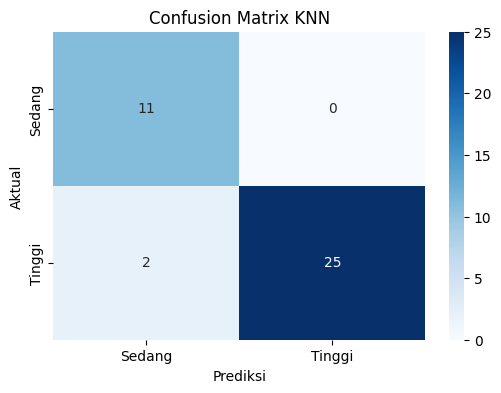

In [16]:
# 1. Prediksi
y_pred = knn_final.predict(X_test)

# 2. Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 3. Diagram Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sedang', 'Tinggi'],
            yticklabels=['Sedang', 'Tinggi'])
plt.title("Confusion Matrix KNN")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()
